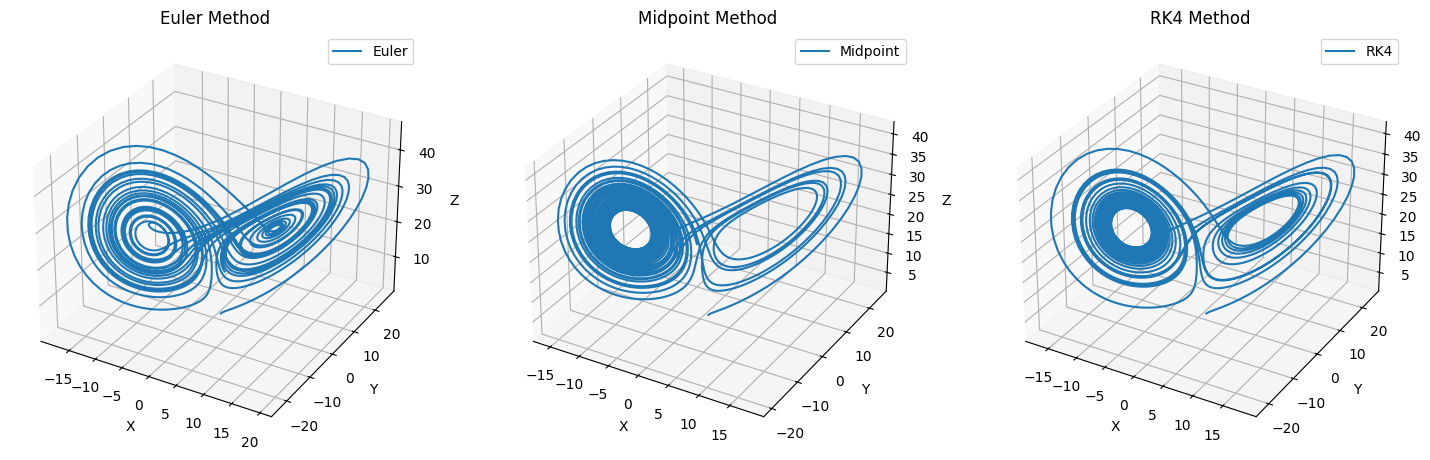

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
A = 10
B = 25
C = 8/3
step_size = 0.01  # (dt) Smaller step size to avoid inaccurate results
num_steps = 3000  # (duration) Total number of steps

# Initial Conditions
x0, y0, z0 = 1.0, 1.0, 1.0


# System of differential equations
def system(xyz):
    x, y, z = xyz
    dxdt = A * (y - x)
    dydt = -x * z + B * x - y
    dzdt = x * y - C * z
    return np.array([dxdt, dydt, dzdt])


# Euler's Method
def euler_method(x0, y0, z0, step_size):
    xyz = np.array([x0, y0, z0])
    results = [xyz.copy()]
    current_step = 0
    while current_step < num_steps:
        deltas = system(xyz) * step_size
        xyz += deltas
        results.append(xyz.copy())
        current_step += 1
    return np.array(results)


# Midpoint Method
def midpoint_method(x0, y0, z0, step_size):
    xyz = np.array([x0, y0, z0])
    results = [xyz.copy()]
    current_step = 0
    while current_step < num_steps:
        k1 = system(xyz)
        mid_xyz = xyz + step_size / 2 * k1
        k2 = system(mid_xyz)
        delta_xyz = step_size * k2
        xyz += delta_xyz
        results.append(xyz.copy())
        current_step += 1
    return np.array(results)


# RK4 method
def rk4_method(x0, y0, z0, step_size):
    xyz = np.array([x0, y0, z0])
    results = [xyz.copy()]
    current_step = 0
    while current_step < num_steps:
        k1 = system(xyz)
        k2 = system(xyz + step_size / 2 * k1)
        k3 = system(xyz + step_size / 2 * k2)
        k4 = system(xyz + step_size * k3)
        delta_xyz = step_size / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        xyz += delta_xyz
        results.append(xyz.copy())
        current_step += 1
    return np.array(results)


# Run simulations
euler_results = euler_method(x0, y0, z0, step_size)
midpoint_results = midpoint_method(x0, y0, z0, step_size)
rk4_results = rk4_method(x0, y0, z0, step_size)

# Plotting results
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

ax1.plot(euler_results[:, 0], euler_results[:, 1], euler_results[:, 2], label='Euler')
ax2.plot(midpoint_results[:, 0], midpoint_results[:, 1], midpoint_results[:, 2], label='Midpoint')
ax3.plot(rk4_results[:, 0], rk4_results[:, 1], rk4_results[:, 2], label='RK4')

ax1.set_title("Euler Method")
ax2.set_title("Midpoint Method")
ax3.set_title("RK4 Method")

for ax in [ax1, ax2, ax3]:
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()

plt.show()